## FUnction

In [34]:
# %load ../../setup.py
"""
Packages for plotting and other stuff
version: 1.0
author: Riasat
"""
# %matplotlib widget

# data loading
import pandas as pd

# data maipulation
import pwlf
import numpy as np
from scipy.interpolate import interp1d, UnivariateSpline
from scipy.signal import find_peaks
from scipy import optimize

# plotting tools
import matplotlib.pyplot as plt

# extra tweaks
import warnings

warnings.filterwarnings("ignore")

# plot tweaks
plt.style.use("seaborn-poster")
pd.options.display.max_columns = None
pd.options.display.float_format = "{:.5f}".format

# function for extrapolation
def extrapolate1d(x, y):
    f = interp1d(x, y, kind="linear", fill_value="extrapolate")
    a = np.arange(0, x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate1d(x, y):
    f = interp1d(x, y, kind="linear", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate2d(x, y):
    f = interp1d(x, y, kind="quadratic", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate3d(x, y):
    f = interp1d(x, y, kind="cubic", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# funciton for polynomial fitting
def polfit(a, b, c):
    z = np.polyfit(a, b, c)
    f = np.poly1d(z)

    x = np.arange(a[0], a[len(a) - 1], 0.001)
    y = f(x)
    return x, y


# function for picewise linear fit
def picewise_linear_fit(x, y, segments):
    my_pwlf = pwlf.PiecewiseLinFit(x, y)  # fit my data
    res = my_pwlf.fit(segments)  # fit the data for n line segments
    # slopes = myPWLF.calc_slopes()  # calculate slopes

    # predict for the determined points
    xHat = np.linspace(min(x), max(x), num=10000)
    yHat = my_pwlf.predict(xHat)

    # calculate statistics
    # p = myPWLF.p_values(method="non-linear", step_size=1e-4)  # p-values
    # se = myPWLF.se  # standard errors
    return xHat, yHat


# curve fit
def cur_fit(x, y):
    func = lambda t, a, c, d: a * np.log(t + c) + d
    popt, pcov = optimize.curve_fit(func, x, y)  # type: ignore
    xx = np.arange(x[0], x[len(x) - 1], 0.001)
    yy = func(xx, *popt)
    return xx, yy


In [35]:
data = pd.read_excel("peak_data.xlsx")
channel = data["voltage"]
distance = data["distance"]

# Calibration Curve


Energy ratios: 
 Americium-241 / Plutonium-239: 
 Energy = 1.06, Peak = 1.07
Energy ratios: 
 Curium-244 / Americium-241: 
 Energy = 1.06, Peak = 1.05


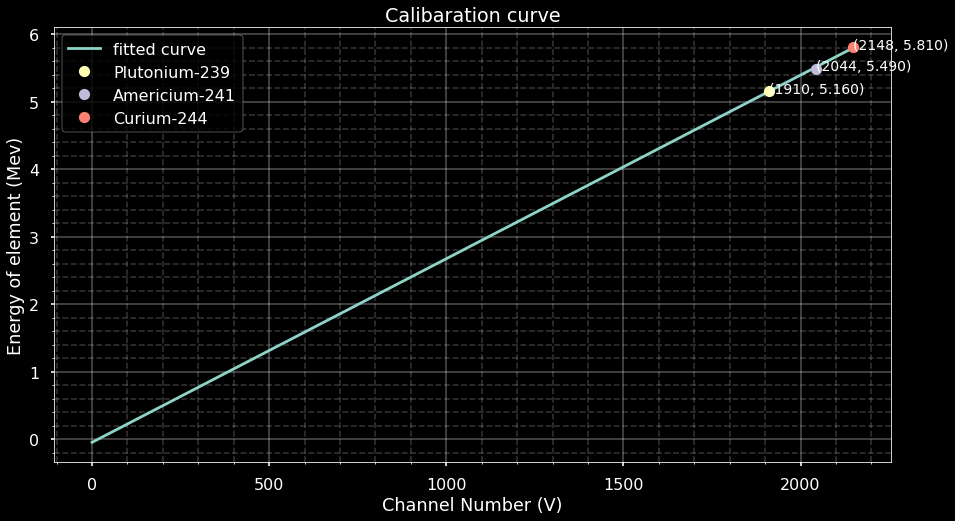

In [36]:
# 244Cm, 241Am, 239Pu
res_name = ["Plutonium-239", "Americium-241", "Curium-244"]

peak_channel = [1910, 2044, 2148]
known_energy = [5.16, 5.49, 5.81]
# extrapolated points
peak_channel_fit, known_energy_fit = polfit(peak_channel, known_energy, 1)
cal_chan_ext, cal_eng_ext = extrapolate1d(peak_channel_fit, known_energy_fit)
pc = [1910, 2148]
ke = [5.16, 5.81]
for i in range(2):
    energy_ratio = known_energy[i + 1] / known_energy[i]
    peak_ratio = peak_channel[i + 1] / peak_channel[i]
    print(
        f"Energy ratios: \n {res_name[i + 1]} / {res_name[i]}: \n Energy = {energy_ratio:.2f}, Peak = {peak_ratio:.2f}"
    )


plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))
plt.title(f"Calibaration curve")
plt.xlabel("Channel Number (V)")
plt.ylabel("Energy of element (Mev)")

plt.plot(cal_chan_ext, cal_eng_ext, "-", label="fitted curve")
for i in range(len(res_name)):
    plt.plot(peak_channel[i], known_energy[i], "o", label=res_name[i])
    plt.annotate(f"({peak_channel[i]}, {known_energy[i]:.3f})", xy=(peak_channel[i]+0.5,known_energy[i]-0.025), fontsize=14)
plt.legend(loc="upper left")
plt.grid(alpha=0.3, which="major")
plt.minorticks_on()
plt.grid(alpha=0.2, which="minor", ls="--")
plt.show()


##


In [37]:
# print(peak_channel[0], peak_channel[len(peak_channel) - 1], channel.min(), channel.max())
# peak, energy = interpolate2d(peak_channel, known_energy)

# print(peak_channel, known_energy)
# print(peak, energy)
enc = []
for i in range(len(channel)):
    energy_cal = np.interp(channel[i], cal_chan_ext, cal_eng_ext)
    enc.append(energy_cal)
    print(f"{channel[i]}, {enc[i]:.2f}")


1808, 4.87
1744, 4.70
1678, 4.52
1592, 4.29
1535, 4.13
1447, 3.89
1379, 3.71
1289, 3.46
1223, 3.28
1154, 3.09
1070, 2.87
1000, 2.68
877, 2.34
743, 1.98
661, 1.75
553, 1.46


In [55]:
delta_e = []
delta_ex = []

# print(f"de     dex")
for i in range(len(channel)):
    if i <= 14:
        de = enc[i] - enc[i + 1]
        dex = de / 2
        delta_e.append(de)
        delta_ex.append(dex)

print(f"{delta_ex}")



[0.08699072771129224, 0.08970918795227023, 0.11689379036204928, 0.07747611686786948, 0.11961225060302683, 0.09242764819324822, 0.12233071084400482, 0.08970918795227023, 0.09378687831373678, 0.11417533012107106, 0.095146108434226, 0.16718530482013993, 0.18213683614551823, 0.11145686988009307, 0.14679685301280587]


## Bragg Curve


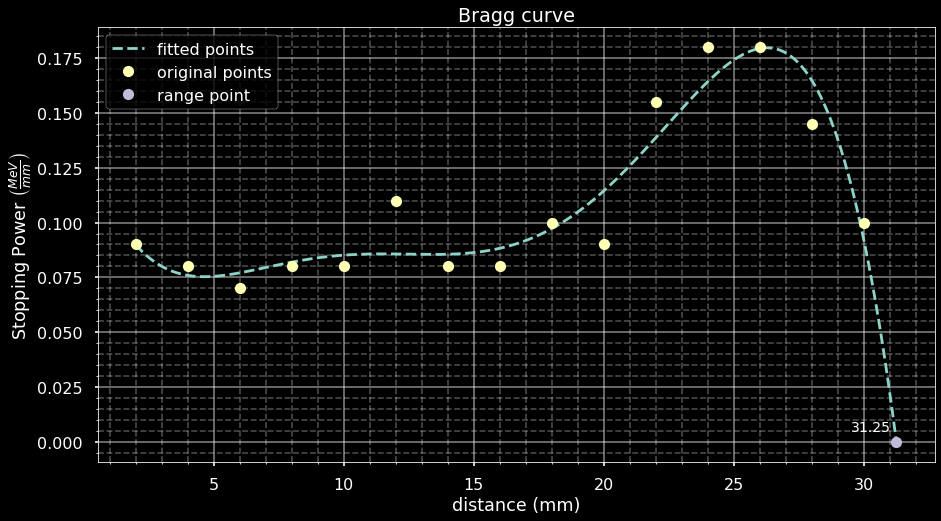

In [56]:
dis1 = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
dex1 = [0.09, 0.08, 0.07, 0.08, 0.08, 0.11, 0.08, 0.08, 0.10, 0.09, 0.155, 0.18, 0.18, 0.145, 0.10]

ds, dexs = polfit(dis1, dex1, 5)
# ds_int, dexs_int = intercube(dis1, dex1)


plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))
plt.title(f"Bragg curve")
plt.xlabel("distance (mm)")
plt.ylabel(r"Stopping Power $\left(\frac{MeV}{mm}\right)$")

plt.plot(ds, dexs, "--", label="fitted points")
# plt.plot(ds_int, dexs_int, "--", label="fitted points")
plt.annotate(f"31.25", xy=(29.5,0.005), fontsize=14)
plt.plot(dis1, dex1, "o", label="original points")
plt.plot(31.25,0, "o", label="range point")

plt.legend(loc="upper left")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")
plt.show()

plt.show()


In [42]:
len(dex1)
print(dex1)
dx = 2*dex1
print(dx)

[0.09, 0.08, 0.07, 0.08, 0.08, 0.11, 0.08, 0.08, 0.1, 0.09, 0.155, 0.18, 0.18, 0.145, 0.1]
[0.09, 0.08, 0.07, 0.08, 0.08, 0.11, 0.08, 0.08, 0.1, 0.09, 0.155, 0.18, 0.18, 0.145, 0.1, 0.09, 0.08, 0.07, 0.08, 0.08, 0.11, 0.08, 0.08, 0.1, 0.09, 0.155, 0.18, 0.18, 0.145, 0.1]
